In [2]:
#!python
import pandas as pd
import numpy as np
import datetime as dt
from glob import glob
import os
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os
from glob import glob
from helper_functions import *

%matplotlib inline

import stumpy
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
import shutil
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
from clustimage import Clustimage
from IPython.display import Image, display, clear_output

import sys # to access the system
import cv2
# plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [3]:
#paths
trading_ = Path('/Users/yash/Desktop/Trading')
code_ = trading_ / "code"
minute_ = trading_ / "historical_data/kite_connect/minute"
minute_5 = trading_ / "historical_data/kite_connect/minute_5"
nifty500 = trading_ / "tradingview_watchlists/broad/ind_nifty500list.csv"
df500 = pd.read_csv(nifty500)
nifty500_list = df500['Symbol']
vwap_img = trading_ / "VWAP/img"

In [4]:
os.chdir(vwap_img)

In [12]:
files = glob(str(minute_5) + "/*filt*")

In [13]:
len(files)

499

In [10]:
l = []
files = glob('*')
for f in files:
    if 'png' in f:
        # print(f)
        # break
        change = float(f.split('_')[-1].replace('.png',''))
        if change >= 3.0:
            # print(change)
            shutil.move(f, str(vwap_img) + "/plus_3p/" +f)

AEGISCHEM


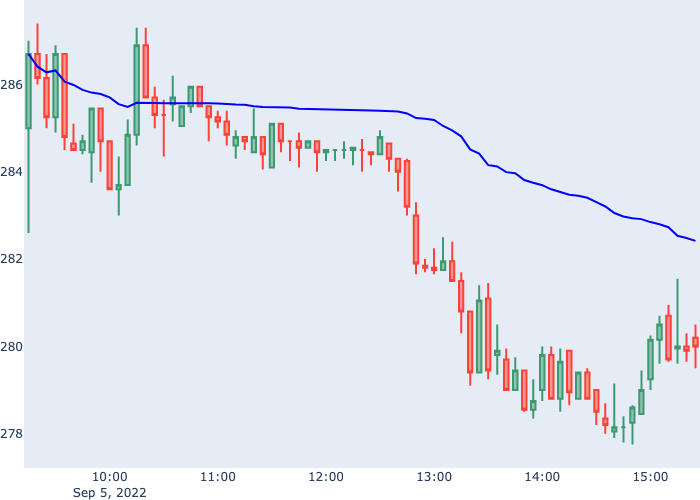

ValueError: invalid literal for int() with base 10: ''

In [7]:
img_files = glob('*')
for i in img_files:
    print(i.split('_')[0])
    display(Image(filename=i))
    setup = -1
    while setup not in range(1,7):
        setup = int(input('Setup: '))
    path2 = str(vwap_img) + "/setup_{}/".format(setup) +i
    shutil.move(i, path2)
    clear_output(wait=True)

In [16]:
for f in files:
    # print(f)
    # if 'filtered' not in f:
    #     print('Skipping', f)
    #     continue
    # try:
    df = pd.read_csv(f)
    # df['DateTime'] = df['date'].apply(lambda x: dt.datetime.strptime(x.split('+')[0], '%Y-%m-%d %H:%M:%S'))
    # df['Date'] = df['date'].apply(lambda x: dt.datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))
    # if 'vwap' not in df.columns:
    #     df = df.groupby(df.Date, group_keys=False).apply(vwap)
    # if 'tp' not in df.columns:
    #     df['tp'] = (df['high']+df['low']+ df['close'])/3
    # if 'tp_vwap' not in df.columns:
    #     df = df.groupby(df.Date, group_keys=False).apply(typical_vwap)
    # if 'vwap_close' not in df.columns:
    #     df['vwap_close'] = df['vwap'] - df['close']
    # if 'vwap_tp' not in df.columns:
    #     df['vwap_typical'] = df['vwap'] - df['tp']

    for name, group in df.groupby(['Date']):
        # print(group.shape[0])
        # if not check_vols(group) or group.shape[0] < 75:
        #     idx = df[df['Date'] == name].index
        #     df.drop(idx, inplace=True)
        # else:
        c = group['close'].iloc[-1]
        o = group['open'].iloc[0]
        h = max(group['high'])
        c0 = group['close'].iloc[0]
        change_ = round((c/o - 1) * 100,2)
        peak_change = round((h/o - 1) * 100,2)
        od = round((c0/o - 1) * 100,2)

        imgname = f.split('/')[-1].split('_')[0] + '_' +str(name).split(' ')[0].replace('-','') + '_' + str(change_)
        # os.chdir(vwap_img)
        # print(od, peak_change)
        if imgname not in glob('*.png') and od > 0 and peak_change > od:
            save_plot(group, imgname)
    # for i in df.columns:
    #     if 'Unnamed' in i:
    #         df.drop(i, inplace = True, axis=1)
    # os.chdir(minute_5)
    # df.to_csv(f + '_filtered.csv')
    print(f)
    # break
    # except:
    #         print('Error in Symbol', f)

/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/PGHL_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/OBEROIRLTY_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/TRENT_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/IDFC_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/ATUL_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/GICRE_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/BDL_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/NIACL_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/RBLBANK_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/RTNIN

CLUSTERING

In [12]:
# Import library
from clustimage import Clustimage

In [13]:

# init with PCA method
cl = Clustimage(grayscale=True)
# cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8)})

[clustimage] >INFO> filepath is set to [/var/folders/_3/qbdc2k351_379d2nk16_q9p80000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/_3/qbdc2k351_379d2nk16_q9p80000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/_3/qbdc2k351_379d2nk16_q9p80000gn/T/clustimage]


In [14]:
results = cl.fit_transform(str(vwap_img) + '/plus_3p//', max_clust=50, cluster = 'kmeans')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [/Users/yash/Desktop/Trading/VWAP/img/plus_3p//]
[clustimage] >INFO> [8721] files are collected recursively from path: [/Users/yash/Desktop/Trading/VWAP/img/plus_3p//]
[clustimage] >INFO> [8721] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 8721/8721 [00:49<00:00, 175.12it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16384] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3176] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16384] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=8721, features=3176
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 47/47 [20:19<00:00, 25.94s/it]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (8721, 3176) feature-space.


[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


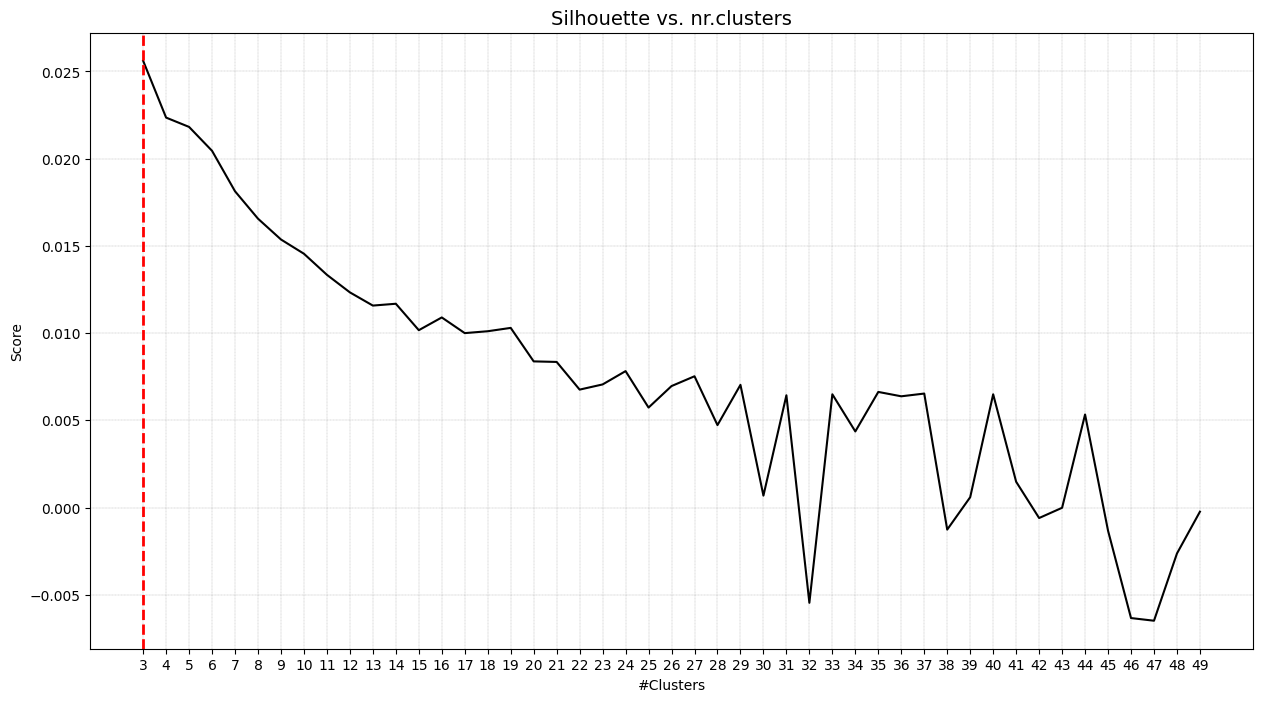

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.336


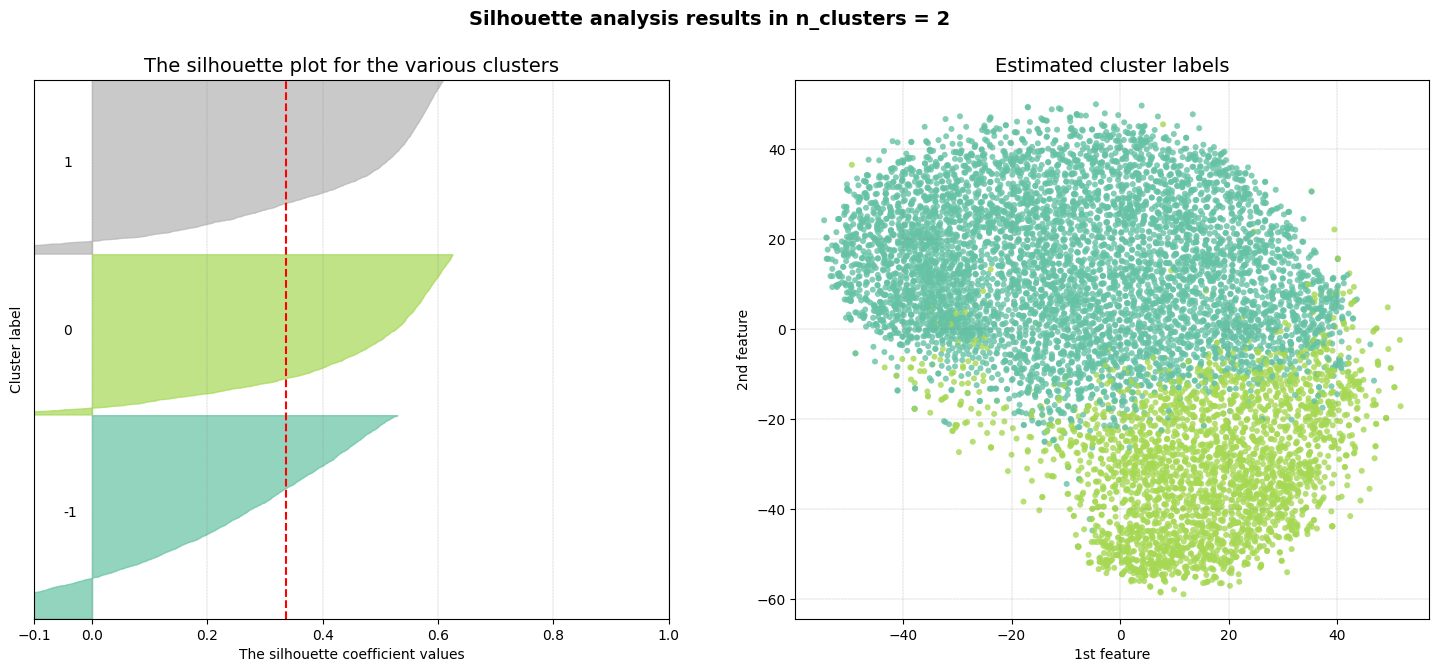

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot: title={'center': 'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot: title={'center': 'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [15]:
# Cluster evaluation plots such as the Silhouette plot
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

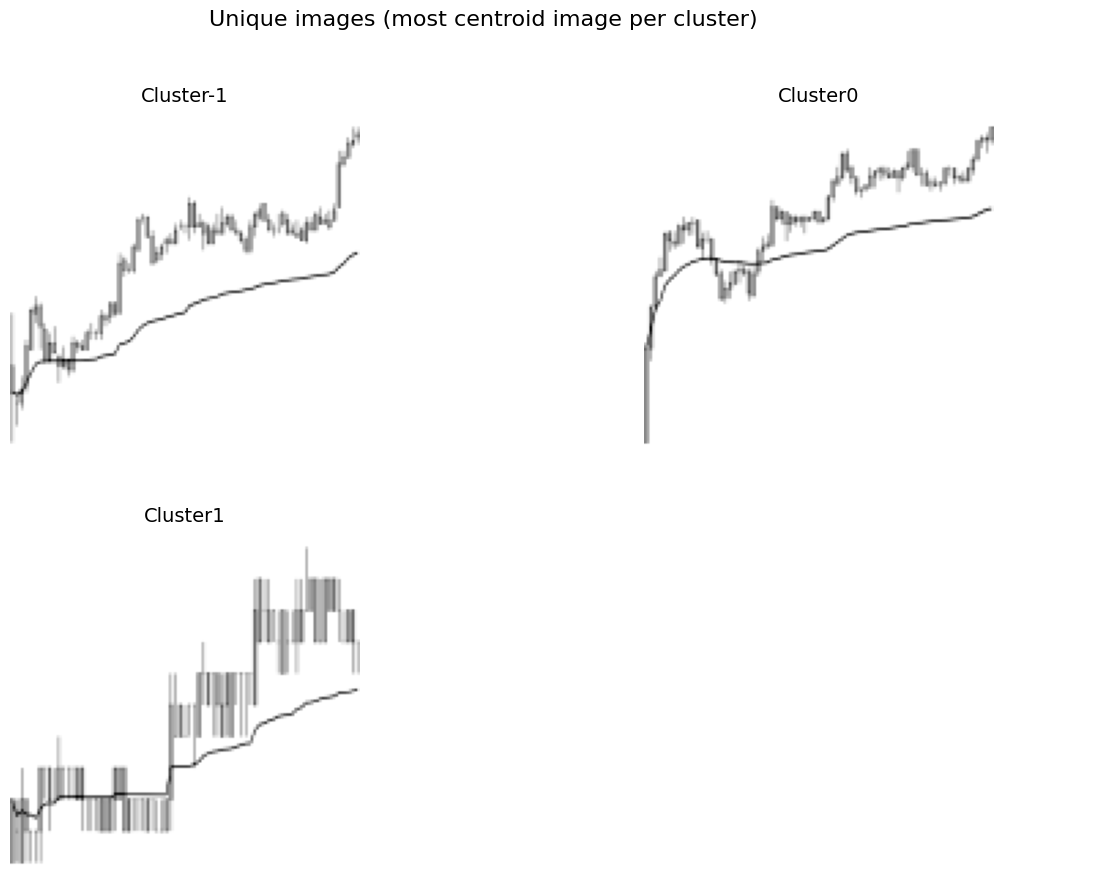

In [17]:
cl.plot_unique(img_mean=False)

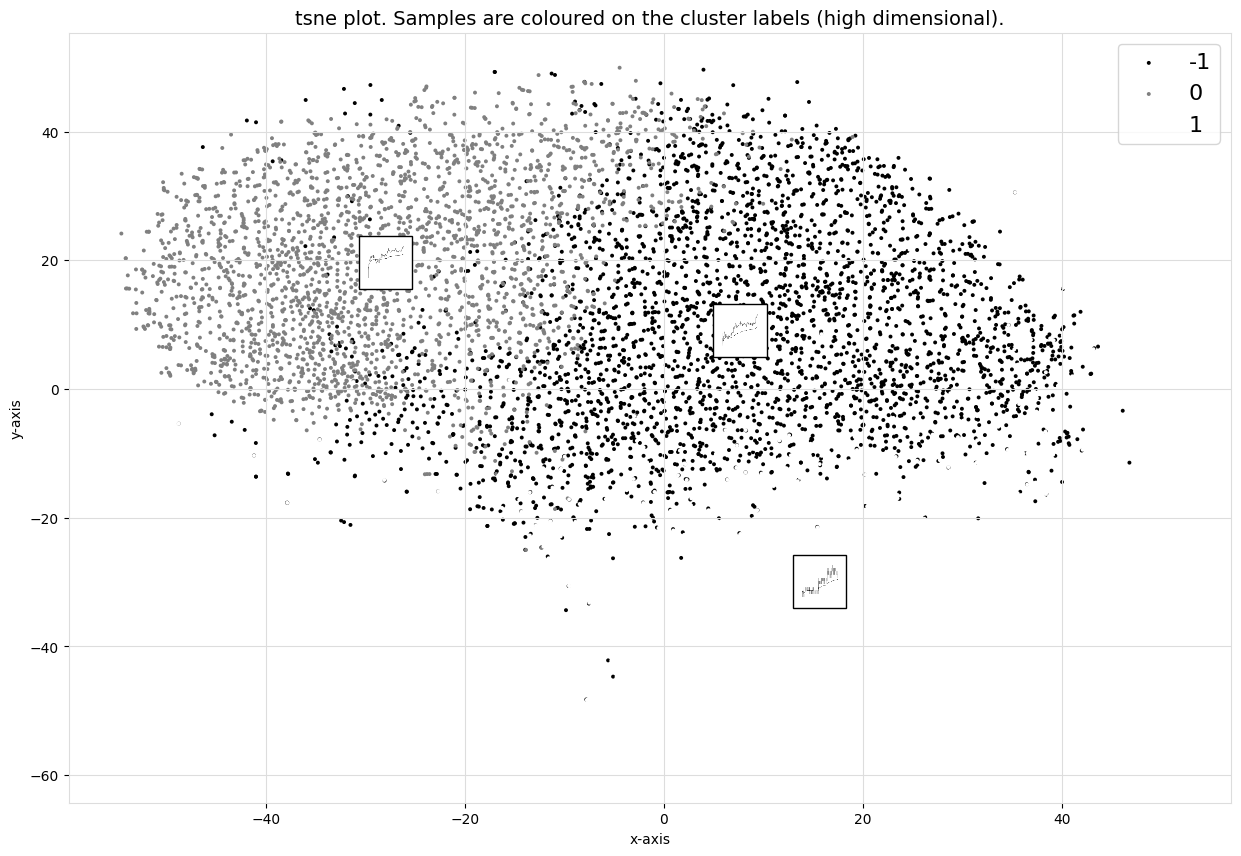

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [18]:
cl.scatter(dotsize=8, zoom=0.2, img_mean=False)